In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# --------------------------------------------------
# Funciones: Matrices de rotación en 2x2
# --------------------------------------------------
def R_x(theta):
    """
    Matriz de rotación alrededor de eje X:
    R_x(theta) = [[ cos(theta/2), -i sin(theta/2) ],
                  [ -i sin(theta/2), cos(theta/2) ]]
    """
    return np.array([
        [np.cos(theta/2), -1j*np.sin(theta/2)],
        [-1j*np.sin(theta/2), np.cos(theta/2)]
    ], dtype=complex)

def R_y(theta):
    """
    Matriz de rotación alrededor de eje Y:
    R_y(theta) = [[ cos(theta/2), -sin(theta/2) ],
                  [ sin(theta/2),  cos(theta/2) ]]
    """
    return np.array([
        [ np.cos(theta/2), -np.sin(theta/2)],
        [ np.sin(theta/2),  np.cos(theta/2)]
    ], dtype=complex)

def R_z(theta):
    """
    Matriz de rotación alrededor de eje Z:
    R_z(theta) = [[ e^{-i theta/2}, 0            ],
                  [ 0,             e^{ i theta/2}]]
    """
    return np.array([
        [np.exp(-1j*theta/2), 0],
        [0, np.exp( 1j*theta/2)]
    ], dtype=complex)

In [ ]:
# --------------------------------------------------
# Función de conmutador [A, B] = A B - B A
# --------------------------------------------------
def commutator(A, B):
    return A @ B - B @ A

# --------------------------------------------------
# Ejemplo: Barrer ángulos gamma (R_x) y beta (R_y),
#          y calcular la norma del conmutador [R_x(gamma), R_y(beta)]
# --------------------------------------------------

In [ ]:
# Rango de ángulos (en radianes)
N = 60
gamma_vals = np.linspace(0, 2*np.pi, N)
beta_vals  = np.linspace(0, 2*np.pi, N)

# Matriz para almacenar la "magnitud" (norma) del conmutador
comm_norm_data = np.zeros((N, N), dtype=float)

for i, gamma in enumerate(gamma_vals):
    for j, beta in enumerate(beta_vals):
        # Construimos las compuertas
        Rxg = R_x(gamma)
        Ryb = R_y(beta)

        # Conmutador
        comm = commutator(Rxg, Ryb)

        # Medimos su norma (Frobenius, por ejemplo)
        norm_comm = np.linalg.norm(comm, 'fro')

        comm_norm_data[j, i] = norm_comm

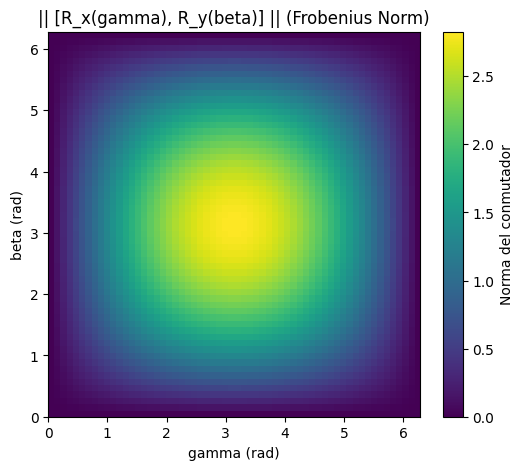

In [ ]:
# --------------------------------------------------
# Visualización simple con imshow
# Eje x => gamma, Eje y => beta
# --------------------------------------------------
plt.figure(figsize=(6, 5))
plt.title("|| [R_x(gamma), R_y(beta)] || (Frobenius Norm)")
plt.xlabel("gamma (rad)")
plt.ylabel("beta (rad)")

# Graficamos la matriz
im = plt.imshow(
    comm_norm_data,
    extent=[0, 2*np.pi, 0, 2*np.pi],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)
plt.colorbar(im, label="Norma del conmutador")

In [ ]:
# Rango de ángulos (en radianes)
N = 60
gamma_vals = np.linspace(0, 2*np.pi, N)
beta_vals  = np.linspace(0, 2*np.pi, N)

# Matriz para almacenar la "magnitud" (norma) del conmutador
comm_norm_data = np.zeros((N, N), dtype=float)

for i, gamma in enumerate(gamma_vals):
    for j, beta in enumerate(beta_vals):
        # Construimos las compuertas
        Rxg = R_x(gamma)
        Rzb = R_z(beta) # Ahora con RZ.

        # Conmutador
        comm = commutator(Rxg, Rzb)

        # Medimos su norma (Frobenius, por ejemplo)
        norm_comm = np.linalg.norm(comm, 'fro')

        comm_norm_data[j, i] = norm_comm

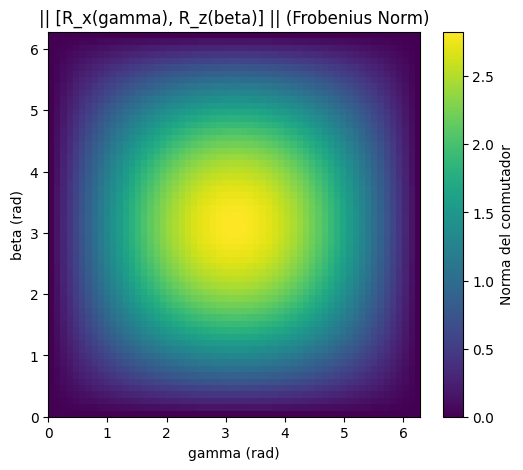

In [ ]:
# --------------------------------------------------
# Visualización simple con imshow
# Eje x => gamma, Eje y => beta
# --------------------------------------------------
plt.figure(figsize=(6, 5))
plt.title("|| [R_x(gamma), R_z(beta)] || (Frobenius Norm)")
plt.xlabel("gamma (rad)")
plt.ylabel("beta (rad)")

# Graficamos la matriz
im = plt.imshow(
    comm_norm_data,
    extent=[0, 2*np.pi, 0, 2*np.pi],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)
plt.colorbar(im, label="Norma del conmutador")

In [ ]:
# Rango de ángulos (en radianes)
N = 60
gamma_vals = np.linspace(0, 2*np.pi, N)
beta_vals  = np.linspace(0, 2*np.pi, N)

# Matriz para almacenar la "magnitud" (norma) del conmutador
comm_norm_data = np.zeros((N, N), dtype=float)

for i, gamma in enumerate(gamma_vals):
    for j, beta in enumerate(beta_vals):
        # Construimos las compuertas
        Rzg = R_z(gamma) # RZ en gamma.
        Ryb = R_y(beta) # Ahora con RY en beta.

        # Conmutador
        comm = commutator(Rzg, Ryb)

        # Medimos su norma (Frobenius, por ejemplo)
        norm_comm = np.linalg.norm(comm, 'fro')

        comm_norm_data[j, i] = norm_comm

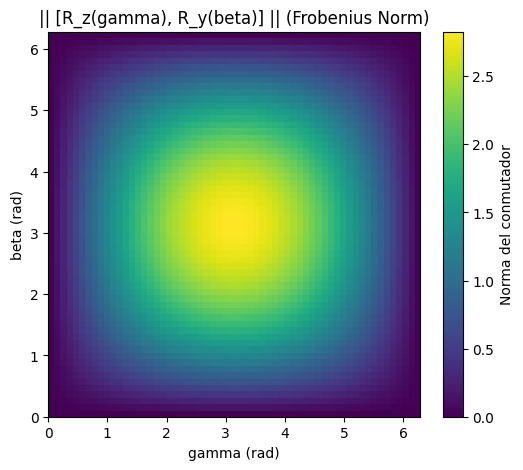

In [ ]:
# --------------------------------------------------
# Visualización simple con imshow
# Eje x => gamma, Eje y => beta
# --------------------------------------------------
plt.figure(figsize=(6, 5))
plt.title("|| [R_z(gamma), R_y(beta)] || (Frobenius Norm)")
plt.xlabel("gamma (rad)")
plt.ylabel("beta (rad)")

# Graficamos la matriz
im = plt.imshow(
    comm_norm_data,
    extent=[0, 2*np.pi, 0, 2*np.pi],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)
plt.colorbar(im, label="Norma del conmutador")

In [ ]:
# --------------------------------------------------
# 3) Realizamos un barrido 3D en (gamma, beta, delta)
#    y calculamos la norma (Frobenius) del conmutador
# --------------------------------------------------

N = 10  # Tamaño de la malla en cada eje (gamma, beta, delta)
gamma_vals = np.linspace(0, 2*np.pi, N)
beta_vals  = np.linspace(0, 2*np.pi, N)
delta_vals = np.linspace(0, 2*np.pi, N)

# Para guardar los valores de la norma del conmutador
comm_val = np.zeros((N, N, N), dtype=float)

# Llenamos la "caja" 3D de datos
for i, g in enumerate(gamma_vals):
    A = R_x(g)  # R_x(gamma)
    for j, b in enumerate(beta_vals):
        Ry = R_y(b)
        for k, d in enumerate(delta_vals):
            Rz = R_z(d)

            # B = R_y(beta)*R_z(delta)
            B = Ry @ Rz

            # Conmutador
            comm = commutator(A, B)

            # Norma (Frobenius) del conmutador
            norm_comm = np.linalg.norm(comm, ord='fro')

            comm_val[i, j, k] = norm_comm

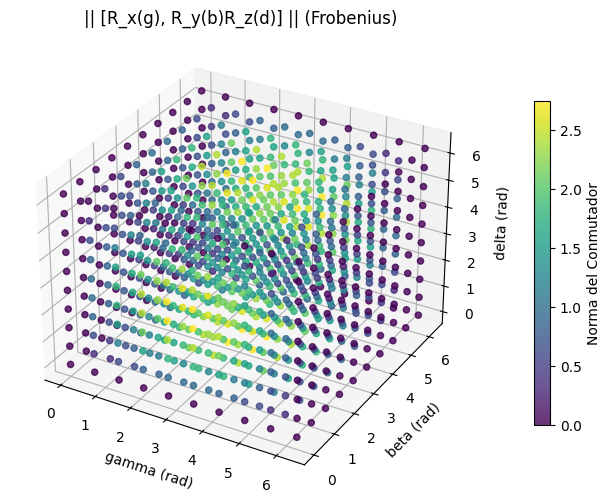

In [ ]:
# --------------------------------------------------
# 4) Visualización 3D (scatter plot)
# --------------------------------------------------
# Para graficar en 3D, definimos un grid con meshgrid
G, B_, D = np.meshgrid(gamma_vals, beta_vals, delta_vals, indexing='ij')

# Aplanamos para hacer un scatter
g_flat = G.ravel()
b_flat = B_.ravel()
d_flat = D.ravel()
val_flat = comm_val.ravel()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(g_flat, b_flat, d_flat,
               c=val_flat,
               cmap='viridis',
               marker='o',
               alpha=0.8,
               s=20)

ax.set_xlabel('gamma (rad)')
ax.set_ylabel('beta (rad)')
ax.set_zlabel('delta (rad)')
ax.set_title('|| [R_x(g), R_y(b)R_z(d)] || (Frobenius)')

# Barra de color
cb = fig.colorbar(p, ax=ax, shrink=0.7, pad=0.1)
cb.set_label("Norma del Conmutador")